In [1]:
%%javascript
jQuery('.code_cell:contains("%%R")').css("background", "#eafaf1")

<IPython.core.display.Javascript object>

# Loading data

In [2]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

import pandas as pd

pd.__version__

'0.20.3'

In [3]:
%load_ext rpy2.ipython

In [5]:
%%R
.libPaths('/home/me/R/x86_64-pc-linux-gnu-library/3.4')
.libPaths()

library(dplyr)
library(ggplot2)

In [184]:
# load data
df = pd.read_csv(
    '../data/gapminder.tsv', 
    delimiter='\t'
)
df.head()

country continent  year  lifeExp       pop   gdpPercap
0  Afghanistan      Asia  1952   28.801   8425333  779.445314
1  Afghanistan      Asia  1957   30.332   9240934  820.853030
2  Afghanistan      Asia  1962   31.997  10267083  853.100710
3  Afghanistan      Asia  1967   34.020  11537966  836.197138
4  Afghanistan      Asia  1972   36.088  13079460  739.981106

In [185]:
%%R
df <- tbl_df(read.csv(
        "../data/gapminder.tsv", 
        sep="\t", 
        stringsAsFactors = FALSE))
df

# A tibble: 1,704 x 6
       country continent  year lifeExp      pop gdpPercap
         <chr>     <chr> <int>   <dbl>    <int>     <dbl>
 1 Afghanistan      Asia  1952  28.801  8425333  779.4453
 2 Afghanistan      Asia  1957  30.332  9240934  820.8530
 3 Afghanistan      Asia  1962  31.997 10267083  853.1007
 4 Afghanistan      Asia  1967  34.020 11537966  836.1971
 5 Afghanistan      Asia  1972  36.088 13079460  739.9811
 6 Afghanistan      Asia  1977  38.438 14880372  786.1134
 7 Afghanistan      Asia  1982  39.854 12881816  978.0114
 8 Afghanistan      Asia  1987  40.822 13867957  852.3959
 9 Afghanistan      Asia  1992  41.674 16317921  649.3414
10 Afghanistan      Asia  1997  41.763 22227415  635.3414
# ... with 1,694 more rows


In [9]:
df.__class__
df.shape
df.info()

pandas.core.frame.DataFrame

(1704, 6)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1704 entries, 0 to 1703
Data columns (total 6 columns):
country      1704 non-null object
continent    1704 non-null object
year         1704 non-null int64
lifeExp      1704 non-null float64
pop          1704 non-null int64
gdpPercap    1704 non-null float64
dtypes: float64(2), int64(2), object(2)
memory usage: 80.0+ KB


In [10]:
%%R
df %>% dim
df %>% str

Classes ‘tbl_df’, ‘tbl’ and 'data.frame':	1704 obs. of  6 variables:
 $ country  : chr  "Afghanistan" "Afghanistan" "Afghanistan" "Afghanistan" ...
 $ continent: chr  "Asia" "Asia" "Asia" "Asia" ...
 $ year     : int  1952 1957 1962 1967 1972 1977 1982 1987 1992 1997 ...
 $ lifeExp  : num  28.8 30.3 32 34 36.1 ...
 $ pop      : int  8425333 9240934 10267083 11537966 13079460 14880372 12881816 13867957 16317921 22227415 ...
 $ gdpPercap: num  779 821 853 836 740 ...


# Subsetting data

## Columns

In [24]:
# subset a single column
country_df = df['country']
country_df.__class__
df.country.head()
df.country.size

pandas.core.series.Series

0    Afghanistan
1    Afghanistan
2    Afghanistan
3    Afghanistan
4    Afghanistan
Name: country, dtype: object

1704

In [38]:
%%R
df %>% select(country) -> x
x %>% class %>% print
x %>% head %>% print
x %>% nrow

[1] "tbl_df"     "tbl"        "data.frame"
# A tibble: 6 x 1
      country
        <chr>
1 Afghanistan
2 Afghanistan
3 Afghanistan
4 Afghanistan
5 Afghanistan
6 Afghanistan
[1] 1704


In [28]:
country_df = df[['country']]
country_df.__class__
df.country.head()
df.country.size

pandas.core.frame.DataFrame

0    Afghanistan
1    Afghanistan
2    Afghanistan
3    Afghanistan
4    Afghanistan
Name: country, dtype: object

1704

In [39]:
%%R
x<- df[,'country']
x %>% class %>% print
x %>% head %>% print
x %>% nrow

[1] "tbl_df"     "tbl"        "data.frame"
# A tibble: 6 x 1
      country
        <chr>
1 Afghanistan
2 Afghanistan
3 Afghanistan
4 Afghanistan
5 Afghanistan
6 Afghanistan
[1] 1704


In [35]:
# subset multiple columns
tmp = df[['country', 'continent', 'year']]
tmp.head()

country continent  year
0  Afghanistan      Asia  1952
1  Afghanistan      Asia  1957
2  Afghanistan      Asia  1962
3  Afghanistan      Asia  1967
4  Afghanistan      Asia  1972

In [79]:
%%R
df %>% select(country, continent, year) -> x
x %>% head %>% print



# A tibble: 6 x 3
      country continent  year
        <chr>     <chr> <int>
1 Afghanistan      Asia  1952
2 Afghanistan      Asia  1957
3 Afghanistan      Asia  1962
4 Afghanistan      Asia  1967
5 Afghanistan      Asia  1972
6 Afghanistan      Asia  1977


In [40]:
df.columns
df.columns.__class__

Index(['country', 'continent', 'year', 'lifeExp', 'pop', 'gdpPercap'], dtype='object')

pandas.core.indexes.base.Index

In [42]:
%%R
df %>% colnames %>% print
df %>% colnames %>% class

[1] "country"   "continent" "year"      "lifeExp"   "pop"       "gdpPercap"
[1] "character"


In [43]:
df.drop('continent', axis=1).head()

country  year  lifeExp       pop   gdpPercap
0  Afghanistan  1952   28.801   8425333  779.445314
1  Afghanistan  1957   30.332   9240934  820.853030
2  Afghanistan  1962   31.997  10267083  853.100710
3  Afghanistan  1967   34.020  11537966  836.197138
4  Afghanistan  1972   36.088  13079460  739.981106

In [44]:
%%R
df %>% select(-continent) %>% head

# A tibble: 6 x 5
      country  year lifeExp      pop gdpPercap
        <chr> <int>   <dbl>    <int>     <dbl>
1 Afghanistan  1952  28.801  8425333  779.4453
2 Afghanistan  1957  30.332  9240934  820.8530
3 Afghanistan  1962  31.997 10267083  853.1007
4 Afghanistan  1967  34.020 11537966  836.1971
5 Afghanistan  1972  36.088 13079460  739.9811
6 Afghanistan  1977  38.438 14880372  786.1134


## Rows

### loc

In [45]:
# first row
x = df.loc[0]
x.__class__
x

pandas.core.series.Series

country      Afghanistan
continent           Asia
year                1952
lifeExp           28.801
pop              8425333
gdpPercap        779.445
Name: 0, dtype: object

In [78]:
%%R
df[1,] -> x
x %>% print
x %>% class



# A tibble: 1 x 6
      country continent  year lifeExp     pop gdpPercap
        <chr>     <chr> <int>   <dbl>   <int>     <dbl>
1 Afghanistan      Asia  1952  28.801 8425333  779.4453
[1] "tbl_df"     "tbl"        "data.frame"


In [56]:
# 100th row
df.loc[99]

country      Bangladesh
continent          Asia
year               1967
lifeExp          43.453
pop            62821884
gdpPercap       721.186
Name: 99, dtype: object

In [58]:
%%R
df %>% slice(10) -> x
x %>% print


# A tibble: 1 x 6
      country continent  year lifeExp      pop gdpPercap
        <chr>     <chr> <int>   <dbl>    <int>     <dbl>
1 Afghanistan      Asia  1997  41.763 22227415  635.3414


In [60]:
# this will fail
try:
    df.loc[-1]
except KeyError:
    print("error")

error


In [61]:
df.loc[[1, 99, 111]]
df.loc[[1, 99, 111]].__class__

country continent  year  lifeExp       pop     gdpPercap
1    Afghanistan      Asia  1957   30.332   9240934    820.853030
99    Bangladesh      Asia  1967   43.453  62821884    721.186086
111      Belgium    Europe  1967   70.940   9556500  13149.041190

pandas.core.frame.DataFrame

In [63]:
%%R
df[c(1, 99, 111),]

# A tibble: 3 x 6
      country continent  year lifeExp      pop  gdpPercap
        <chr>     <chr> <int>   <dbl>    <int>      <dbl>
1 Afghanistan      Asia  1952  28.801  8425333   779.4453
2  Bangladesh      Asia  1962  41.216 56839289   686.3416
3     Belgium    Europe  1962  70.250  9218400 10991.2068


In [65]:
%%R
df %>% slice(c(1, 99, 111))

# A tibble: 3 x 6
      country continent  year lifeExp      pop  gdpPercap
        <chr>     <chr> <int>   <dbl>    <int>      <dbl>
1 Afghanistan      Asia  1952  28.801  8425333   779.4453
2  Bangladesh      Asia  1962  41.216 56839289   686.3416
3     Belgium    Europe  1962  70.250  9218400 10991.2068


### `iloc`

In [66]:
x = df.iloc[0]
x.__class__
x

pandas.core.series.Series

country      Afghanistan
continent           Asia
year                1952
lifeExp           28.801
pop              8425333
gdpPercap        779.445
Name: 0, dtype: object

In [69]:
df.iloc[99]
df.iloc[-1]

country      Bangladesh
continent          Asia
year               1967
lifeExp          43.453
pop            62821884
gdpPercap       721.186
Name: 99, dtype: object

country      Zimbabwe
continent      Africa
year             2007
lifeExp        43.487
pop          12311143
gdpPercap     469.709
Name: 1703, dtype: object

In [70]:
df.iloc[[1, 99, 111]]

country continent  year  lifeExp       pop     gdpPercap
1    Afghanistan      Asia  1957   30.332   9240934    820.853030
99    Bangladesh      Asia  1967   43.453  62821884    721.186086
111      Belgium    Europe  1967   70.940   9556500  13149.041190

### `ix` (deprecated)

In [76]:
df.ix[0]

country      Afghanistan
continent           Asia
year                1952
lifeExp           28.801
pop              8425333
gdpPercap        779.445
Name: 0, dtype: object

In [75]:
try:
    df.ix[-1]
except KeyError:
    print("error")

df.ix[[0, 99, 999]]

error


country continent  year  lifeExp       pop    gdpPercap
0    Afghanistan      Asia  1952   28.801   8425333   779.445314
99    Bangladesh      Asia  1967   43.453  62821884   721.186086
999     Mongolia      Asia  1967   51.253   1149500  1226.041130

## Rows and columns

In [84]:
x = df.loc[
    [0, 99, 999], 
    ['country', 'lifeExp', 'gdpPercap']]

x.__class__
x

pandas.core.frame.DataFrame

country  lifeExp    gdpPercap
0    Afghanistan   28.801   779.445314
99    Bangladesh   43.453   721.186086
999     Mongolia   51.253  1226.041130

In [81]:
%%R
df %>% 
 slice(c(1, 99, 999)) %>% 
 select(country, lifeExp, gdpPercap) 

# A tibble: 3 x 3
      country lifeExp gdpPercap
        <chr>   <dbl>     <dbl>
1 Afghanistan  28.801  779.4453
2  Bangladesh  41.216  686.3416
3    Mongolia  48.251 1056.3540


In [82]:
%%R
df[c(1, 99, 999), 
   c('country', 'lifeExp', 'gdpPercap')] 

# A tibble: 3 x 3
      country lifeExp gdpPercap
        <chr>   <dbl>     <dbl>
1 Afghanistan  28.801  779.4453
2  Bangladesh  41.216  686.3416
3    Mongolia  48.251 1056.3540


In [88]:
df.iloc[
    [0, 99, 999], 
    [0, 3, 5]
]

country  lifeExp    gdpPercap
0    Afghanistan   28.801   779.445314
99    Bangladesh   43.453   721.186086
999     Mongolia   51.253  1226.041130

In [87]:
%%R
df[c(1, 99, 999), c(1, 4, 6)] %>% print

df %>% 
 slice(c(1, 99, 999)) %>% 
 select(1, 4, 6)

# A tibble: 3 x 3
      country lifeExp gdpPercap
        <chr>   <dbl>     <dbl>
1 Afghanistan  28.801  779.4453
2  Bangladesh  41.216  686.3416
3    Mongolia  48.251 1056.3540
# A tibble: 3 x 3
      country lifeExp gdpPercap
        <chr>   <dbl>     <dbl>
1 Afghanistan  28.801  779.4453
2  Bangladesh  41.216  686.3416
3    Mongolia  48.251 1056.3540


In [89]:
x = (df.country == 'United States')
x.__class__
x.head()

pandas.core.series.Series

0    False
1    False
2    False
3    False
4    False
Name: country, dtype: bool

In [93]:
%%R

x <- (df$country == 'United States') 
x %>% class %>% print
x %>% head





[1] "logical"
[1] FALSE FALSE FALSE FALSE FALSE FALSE


In [95]:
df.loc[(df.country == 'United States') & (df.year == 1982), :]

country continent  year  lifeExp        pop    gdpPercap
1614  United States  Americas  1982    74.65  232187835  25009.55914

In [96]:
%%R

df %>% filter(country == 'United States', year == 1982) %>% print

df[df$country == 'United States' & df$year == 1982, ] %>% print

# A tibble: 1 x 6
        country continent  year lifeExp       pop gdpPercap
          <chr>     <chr> <int>   <dbl>     <int>     <dbl>
1 United States  Americas  1982   74.65 232187835  25009.56
# A tibble: 1 x 6
        country continent  year lifeExp       pop gdpPercap
          <chr>     <chr> <int>   <dbl>     <int>     <dbl>
1 United States  Americas  1982   74.65 232187835  25009.56


In [97]:
le_mean = df.lifeExp.mean()
le_mean

59.474439366197174

In [100]:
%%R

mean(df$lifeExp) %>% print

df %>% 
    summarise(le_mean = mean(lifeExp)) %>% 
    `[[`(1)

[1] 59.47444
[1] 59.47444


In [102]:
df.loc[df.lifeExp > le_mean, 'country'].unique()

array(['Albania', 'Algeria', 'Argentina', 'Australia', 'Austria',
       'Bahrain', 'Bangladesh', 'Belgium', 'Bolivia',
       'Bosnia and Herzegovina', 'Botswana', 'Brazil', 'Bulgaria',
       'Cambodia', 'Canada', 'Chile', 'China', 'Colombia', 'Comoros',
       'Costa Rica', 'Croatia', 'Cuba', 'Czech Republic', 'Denmark',
       'Dominican Republic', 'Ecuador', 'Egypt', 'El Salvador', 'Finland',
       'France', 'Gabon', 'Germany', 'Ghana', 'Greece', 'Guatemala',
       'Haiti', 'Honduras', 'Hong Kong, China', 'Hungary', 'Iceland',
       'India', 'Indonesia', 'Iran', 'Iraq', 'Ireland', 'Israel', 'Italy',
       'Jamaica', 'Japan', 'Jordan', 'Korea, Dem. Rep.', 'Korea, Rep.',
       'Kuwait', 'Lebanon', 'Lesotho', 'Libya', 'Malaysia', 'Mauritania',
       'Mauritius', 'Mexico', 'Mongolia', 'Montenegro', 'Morocco',
       'Myanmar', 'Namibia', 'Nepal', 'Netherlands', 'New Zealand',
       'Nicaragua', 'Norway', 'Oman', 'Pakistan', 'Panama', 'Paraguay',
       'Peru', 'Philippines', 'P

In [138]:
%%R

df %>% 
    filter(lifeExp > mean(lifeExp)) %>% 
    select(country) %>% 
    distinct %>% `[[`(1) %>% head(20)



 [1] "Albania"                "Algeria"                "Argentina"             
 [4] "Australia"              "Austria"                "Bahrain"               
 [7] "Bangladesh"             "Belgium"                "Bolivia"               
[10] "Bosnia and Herzegovina" "Botswana"               "Brazil"                
[13] "Bulgaria"               "Cambodia"               "Canada"                
[16] "Chile"                  "China"                  "Colombia"              
[19] "Comoros"                "Costa Rica"            


In [141]:
%%R

x <- df[df$lifeExp > mean(df$lifeExp), "country"]

head(unique(x), 20)

# A tibble: 20 x 1
                  country
                    <chr>
 1                Albania
 2                Algeria
 3              Argentina
 4              Australia
 5                Austria
 6                Bahrain
 7             Bangladesh
 8                Belgium
 9                Bolivia
10 Bosnia and Herzegovina
11               Botswana
12                 Brazil
13               Bulgaria
14               Cambodia
15                 Canada
16                  Chile
17                  China
18               Colombia
19                Comoros
20             Costa Rica


# grouped and aggregated calculations

Look at all the cool things dataframes and series objects can do!

- https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.html
- https://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.html

In [105]:
df.__class__
df.groupby('year')

pandas.core.frame.DataFrame

In [108]:
%%R

df %>% class %>% print
df %>% group_by(year) %>% class

[1] "tbl_df"     "tbl"        "data.frame"
[1] "grouped_df" "tbl_df"     "tbl"        "data.frame"


In [107]:
df.groupby('year')['lifeExp']

In [114]:
df.groupby('year')['lifeExp'].mean()

year
1952    49.057620
1957    51.507401
1962    53.609249
1967    55.678290
1972    57.647386
1977    59.570157
1982    61.533197
1987    63.212613
1992    64.160338
1997    65.014676
2002    65.694923
2007    67.007423
Name: lifeExp, dtype: float64

In [119]:
%%R

df %>% 
    group_by(year) %>% 
    summarize(
        life.exp = mean(lifeExp)
    )

# A tibble: 12 x 2
    year life.exp
   <int>    <dbl>
 1  1952 49.05762
 2  1957 51.50740
 3  1962 53.60925
 4  1967 55.67829
 5  1972 57.64739
 6  1977 59.57016
 7  1982 61.53320
 8  1987 63.21261
 9  1992 64.16034
10  1997 65.01468
11  2002 65.69492
12  2007 67.00742


In [116]:
x = df.groupby('year')[['lifeExp', 'gdpPercap']]
x.__class__
x.mean()

pandas.core.groupby.DataFrameGroupBy

lifeExp     gdpPercap
year                         
1952  49.057620   3725.276046
1957  51.507401   4299.408345
1962  53.609249   4725.812342
1967  55.678290   5483.653047
1972  57.647386   6770.082815
1977  59.570157   7313.166421
1982  61.533197   7518.901673
1987  63.212613   7900.920218
1992  64.160338   8158.608521
1997  65.014676   9090.175363
2002  65.694923   9917.848365
2007  67.007423  11680.071820

In [118]:
%%R

df %>% 
    group_by(year) %>% 
    summarize(
        life.exp = mean(lifeExp),
        gdp.percap = mean(gdpPercap)
    )

# A tibble: 12 x 3
    year life.exp gdp.percap
   <int>    <dbl>      <dbl>
 1  1952 49.05762   3725.276
 2  1957 51.50740   4299.408
 3  1962 53.60925   4725.812
 4  1967 55.67829   5483.653
 5  1972 57.64739   6770.083
 6  1977 59.57016   7313.166
 7  1982 61.53320   7518.902
 8  1987 63.21261   7900.920
 9  1992 64.16034   8158.609
10  1997 65.01468   9090.175
11  2002 65.69492   9917.848
12  2007 67.00742  11680.072


In [151]:
(df
    .groupby(['year', 'continent'])
    [['lifeExp', 'gdpPercap']]
    .mean()
    .head(8)
).reset_index()

year continent    lifeExp     gdpPercap
0  1952    Africa  39.135500   1252.572466
1  1952  Americas  53.279840   4079.062552
2  1952      Asia  46.314394   5195.484004
3  1952    Europe  64.408500   5661.057435
4  1952   Oceania  69.255000  10298.085650
5  1957    Africa  41.266346   1385.236062
6  1957  Americas  55.960280   4616.043733
7  1957      Asia  49.318544   5787.732940

In [123]:
%%R

df %>% 
    group_by(year, continent) %>% 
    summarize(
        life.exp = mean(lifeExp),
        gdp.percap = mean(gdpPercap)
    )

# A tibble: 60 x 4
# Groups:   year [?]
    year continent life.exp gdp.percap
   <int>     <chr>    <dbl>      <dbl>
 1  1952    Africa 39.13550   1252.572
 2  1952  Americas 53.27984   4079.063
 3  1952      Asia 46.31439   5195.484
 4  1952    Europe 64.40850   5661.057
 5  1952   Oceania 69.25500  10298.086
 6  1957    Africa 41.26635   1385.236
 7  1957  Americas 55.96028   4616.044
 8  1957      Asia 49.31854   5787.733
 9  1957    Europe 66.70307   6963.013
10  1957   Oceania 70.29500  11598.522
# ... with 50 more rows


In [125]:
df.groupby('continent')['country'].nunique()

continent
Africa      52
Americas    25
Asia        33
Europe      30
Oceania      2
Name: country, dtype: int64

In [126]:
%%R

df %>%
    group_by(continent) %>%
    summarise(countries = n_distinct(country))

# A tibble: 5 x 2
  continent countries
      <chr>     <int>
1    Africa        52
2  Americas        25
3      Asia        33
4    Europe        30
5   Oceania         2


In [130]:
import matplotlib.pyplot
%matplotlib inline

In [133]:
gyle = df.groupby('year')['lifeExp'].mean()
gyle

year
1952    49.057620
1957    51.507401
1962    53.609249
1967    55.678290
1972    57.647386
1977    59.570157
1982    61.533197
1987    63.212613
1992    64.160338
1997    65.014676
2002    65.694923
2007    67.007423
Name: lifeExp, dtype: float64

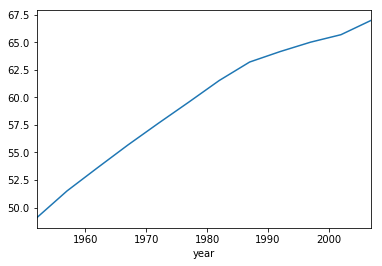

In [132]:
gyle.plot()

In [166]:
%%R

gyle.R <-
    df %>%
    group_by(year) %>%
    summarise(life.exp = mean(lifeExp))

gyle.R

# A tibble: 12 x 2
    year life.exp
   <int>    <dbl>
 1  1952 49.05762
 2  1957 51.50740
 3  1962 53.60925
 4  1967 55.67829
 5  1972 57.64739
 6  1977 59.57016
 7  1982 61.53320
 8  1987 63.21261
 9  1992 64.16034
10  1997 65.01468
11  2002 65.69492
12  2007 67.00742


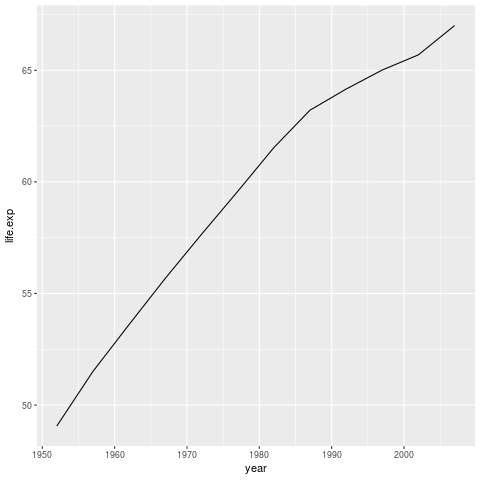

In [167]:
%%R

gyle.R %>% 
    ggplot() +
    geom_line(aes(x = year, y = life.exp))

### Pandas series to dataframe

In [157]:
type(gyle)
gyle

pandas.core.series.Series

year
1952    49.057620
1957    51.507401
1962    53.609249
1967    55.678290
1972    57.647386
1977    59.570157
1982    61.533197
1987    63.212613
1992    64.160338
1997    65.014676
2002    65.694923
2007    67.007423
Name: lifeExp, dtype: float64

In [158]:
type(gyle.reset_index())
gyle.reset_index()

pandas.core.frame.DataFrame

year    lifeExp
0   1952  49.057620
1   1957  51.507401
2   1962  53.609249
3   1967  55.678290
4   1972  57.647386
5   1977  59.570157
6   1982  61.533197
7   1987  63.212613
8   1992  64.160338
9   1997  65.014676
10  2002  65.694923
11  2007  67.007423

# Saving files

In [165]:
(gyle
    .reset_index()
    .to_csv('../output/lifeExp_by_year.py.csv')
)

In [168]:
(gyle
    .reset_index()
    .to_csv(
        '../output/lifeExp_by_year.py.no_index.csv',
        index=False
    )
)

In [171]:
%%R
write.csv(
    gyle.R,
    "../output/lifeExp_by_year.R.csv")

In [172]:
%%R
write.csv(
    gyle.R,
    "../output/lifeExp_by_year.R.no_index.csv",
    row.names=FALSE)

In [183]:
gyle.reset_index().to_feather('../output/lifeExp_by_year.feather')

```python
---------------------------------------------------------------------------
ModuleNotFoundError                       Traceback (most recent call last)
/home/dchen/anaconda3/lib/python3.6/site-packages/pandas/io/feather_format.py in _try_import()
     12     try:
---> 13         import feather
     14     except ImportError:

ModuleNotFoundError: No module named 'feather'

During handling of the above exception, another exception occurred:

ImportError                               Traceback (most recent call last)
<ipython-input-114-d2f5320d06a9> in <module>()
----> 1 df.to_feather('../output/lifeExp_by_year.feather')

/home/dchen/anaconda3/lib/python3.6/site-packages/pandas/core/frame.py in to_feather(self, fname)
   1512         """
   1513         from pandas.io.feather_format import to_feather
-> 1514         to_feather(self, fname)
   1515 
   1516     @Substitution(header='Write out column names. If a list of string is given, \

/home/dchen/anaconda3/lib/python3.6/site-packages/pandas/io/feather_format.py in to_feather(df, path)
     47         raise ValueError("feather only support IO with DataFrames")
     48 
---> 49     feather = _try_import()
     50     valid_types = {'string', 'unicode'}
     51 

/home/dchen/anaconda3/lib/python3.6/site-packages/pandas/io/feather_format.py in _try_import()
     15 
     16         # give a nice error message
---> 17         raise ImportError("the feather-format library is not installed\n"
     18                           "you can install via conda\n"
     19                           "conda install feather-format -c conda-forge\n"

ImportError: the feather-format library is not installed
you can install via conda
conda install feather-format -c conda-forge
or via pip
pip install feather-format
```

```
$ conda install feather-format -c conda-forge
Fetching package metadata .............
Solving package specifications: .

Package plan for installation in environment /home/dchen/anaconda3:

The following NEW packages will be INSTALLED:

    arrow-cpp:      0.4.1-np112py36_3 conda-forge
    feather-format: 0.4.0-py36_2      conda-forge
    jemalloc:       4.4.0-0           conda-forge
    parquet-cpp:    1.2.0.pre-0       conda-forge
    pyarrow:        0.4.1-np112py36_0 conda-forge

The following packages will be SUPERSEDED by a higher-priority channel:

    conda:          4.3.22-py36_0                 --> 4.3.22-py36_0 conda-forge
    conda-env:      2.6.0-0                       --> 2.6.0-0       conda-forge

Proceed ([y]/n)? y

conda-env-2.6. 100% |#############################################################################################| Time: 0:00:00 614.38 kB/s
jemalloc-4.4.0 100% |#############################################################################################| Time: 0:00:00   2.57 MB/s
arrow-cpp-0.4. 100% |#############################################################################################| Time: 0:00:00   5.37 MB/s
parquet-cpp-1. 100% |#############################################################################################| Time: 0:00:00   4.28 MB/s
pyarrow-0.4.1- 100% |#############################################################################################| Time: 0:00:00   4.77 MB/s
conda-4.3.22-p 100% |#############################################################################################| Time: 0:00:00 790.22 kB/s
feather-format 100% |#############################################################################################| Time: 0:00:00   6.23 MB/s
```

In [51]:
df.to_feather('../output/lifeExp_by_year.feather')